In [34]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa
from scipy.spatial.distance import braycurtis
import plotly_express as px

In [35]:
metadata_df = pd.read_csv("train_metadata.csv", index_col="sample")
data_df = pd.read_csv("train_data.csv",  index_col="sample")

## basic overview

How many samples do we have from each subject?

we have 80 baboons in the train data
76.2 samples per baboon on average


Text(0.5, 1.0, 'Number of Samples per Baboon')

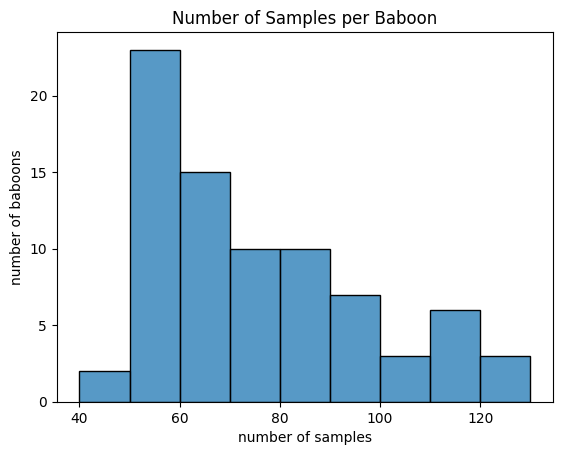

In [36]:
baboons = metadata_df.groupby("baboon_id").count()["collection_date"]
print(f"we have {len(baboons)} baboons in the train data")
print(f"{baboons.mean()} samples per baboon on average")
sns.histplot(baboons, binwidth=10, binrange=(40, 130))
plt.xlabel("number of samples")
plt.ylabel("number of baboons")
plt.title("Number of Samples per Baboon")

What is the time difference between them?

In [37]:
metadata_df["collection_date"] = (pd.to_datetime(metadata_df['collection_date']) - pd.Timestamp('1970-01-01')).dt.days
metadata_df.sort_values(by=["baboon_id", "collection_date"], inplace=True)
ls = []
ds = []
for baboon in metadata_df["baboon_id"].unique():
    curr = metadata_df[metadata_df["baboon_id"] == baboon]["collection_date"].values
    ls.append(np.nan)
    for i in range(len(curr)-1):
        ds.append(curr[i+1]-curr[i])
        ls.append(curr[i+1]-curr[i])

ds = np.array(ds)

Text(0.5, 0, 'time difference between 2 subsequent samples (days)')

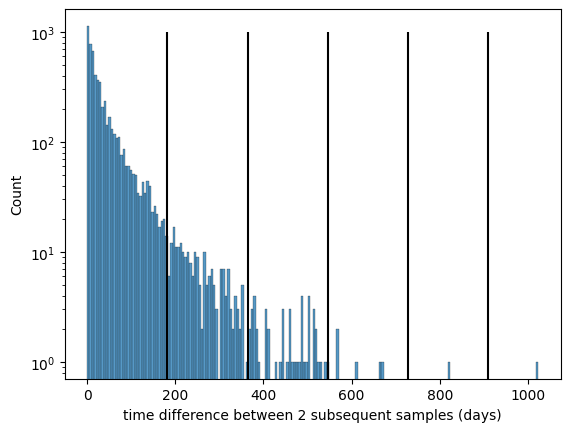

In [38]:
sns.histplot(ds)
max_time = max(ds) 
for i in range(365//2,max_time,365//2):
    plt.vlines(x= i, ymin=0, ymax = 1000, color="black")

plt.yscale("log")
plt.xlabel("time difference between 2 subsequent samples (days)")

## Microbiome Ordination

Calculate Bray-Curtis distances between all microbiome samples and plot PCoA

In [39]:
dist_matrix = beta_diversity(braycurtis, data_df.values)
ordination = pcoa(dist_matrix)
pc_scores = ordination.samples

c:\Users\tomer\AppData\Local\Programs\Python\Python311\Lib\site-packages\skbio\stats\ordination\_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -16.69549737613822 and the largest is 307.0741493384899.
  warn(


In [44]:
pc_scores

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC6087,PC6088,PC6089,PC6090,PC6091,PC6092,PC6093,PC6094,PC6095,PC6096
0,-0.284371,0.017998,0.166362,0.027146,0.036911,0.108028,-0.063975,0.031770,0.200539,0.053125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.317647,-0.292575,-0.118535,0.058171,-0.005837,0.042558,-0.022280,-0.116310,0.033092,0.000107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.275095,-0.378010,-0.150778,0.035183,-0.048386,-0.028815,-0.077729,-0.016332,0.088168,0.008321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.263374,-0.433144,-0.131062,0.089837,-0.013380,-0.023801,-0.033265,-0.057304,0.018703,0.050513,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.243190,-0.509317,-0.134562,0.096025,-0.075489,0.002043,-0.052563,0.026472,0.011020,0.094392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6091,-0.292800,0.024511,-0.048979,0.068938,0.004110,0.057039,-0.053397,-0.070448,0.005406,-0.015917,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6092,-0.439322,0.252916,-0.192676,-0.051092,0.028712,-0.008673,-0.011105,0.118853,0.048470,-0.023904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6093,-0.207374,0.102777,-0.023770,-0.023539,-0.052144,-0.059208,0.023742,-0.029103,-0.023351,0.078630,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6094,0.228994,0.090267,0.001599,-0.026259,-0.021712,0.040530,-0.023352,0.060769,0.067084,0.025747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
pc_scores.iloc[:2]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC6087,PC6088,PC6089,PC6090,PC6091,PC6092,PC6093,PC6094,PC6095,PC6096
0,-0.284371,0.017998,0.166362,0.027146,0.036911,0.108028,-0.063975,0.03177,0.200539,0.053125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.317647,-0.292575,-0.118535,0.058171,-0.005837,0.042558,-0.022280,-0.11631,0.033092,0.000107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


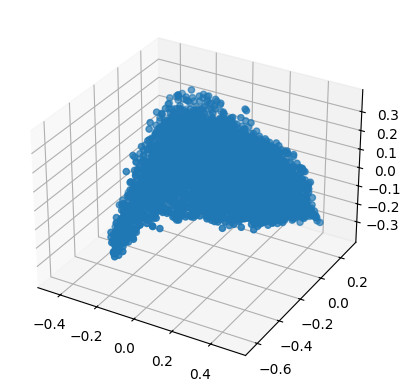

In [51]:
ax = plt.axes(projection="3d")
ax.scatter3D(pc_scores.iloc[:, 0], pc_scores.iloc[:, 1], pc_scores.iloc[:,2])

In [40]:
microbiom_with_sample_data = data_df.join(metadata_df[["baboon_id", "collection_date"]], how="inner")
microbiom_with_sample_data.sort_values(["baboon_id", "collection_date"])

,g_[Eubacterium]_coprostanoligenes_group,g_[Eubacterium]_hallii_group,g_[Eubacterium]_ruminantium_group,g_Acidaminococcus,g_Alloprevotella,g_Bifidobacterium,g_Butyricicoccus,g_CAG-873,g_Campylobacter,g_Candidatus_Methanogranum,...,g_Ruminococcaceae_UCG-014,g_Ruminococcus_1,g_Senegalimassilia,g_Slackia,g_Solobacterium,g_Streptococcus,g_Succinivibrio,g_Treponema_2,baboon_id,collection_date
sample,,,,,,,,,,,,,,,,,,,,,
sample_12050-GAATATACCTGG-407,0.092278,0.001774,0.001412,0.000000,0.017377,0.232994,0.000471,0.000724,0.001050,0.003186,...,0.029468,0.008833,0.000652,0.002100,0.002027,0.002389,0.001520,0.000000,Baboon_101,11445
sample_12050-CGGCCTAAGTTC-407,0.054978,0.000000,0.000340,0.001171,0.023843,0.504515,0.000340,0.013716,0.000000,0.001058,...,0.002418,0.002456,0.002116,0.001096,0.001323,0.000189,0.002116,0.000000,Baboon_101,11461
sample_12050-TAGACTTCAGAG-407,0.011303,0.000345,0.000000,0.001256,0.056138,0.367316,0.000000,0.000345,0.000157,0.012559,...,0.000000,0.009325,0.000000,0.000973,0.000816,0.000188,0.000754,0.000000,Baboon_101,11465
sample_12051-CACTAACAAACG-408,0.002081,0.000000,0.001596,0.000416,0.021021,0.411044,0.003920,0.024004,0.004752,0.098477,...,0.014118,0.001977,0.000416,0.000000,0.000520,0.000000,0.000000,0.000000,Baboon_101,11533
sample_11413-CGGGCGAATTGG-397,0.001270,0.000000,0.000614,0.003072,0.001147,0.574922,0.004506,0.004875,0.000000,0.076602,...,0.007578,0.005694,0.001393,0.000369,0.001680,0.000000,0.001925,0.000451,Baboon_101,11540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_11413-AGCCCGCAAAGG-397,0.018133,0.003507,0.003905,0.003387,0.002351,0.514167,0.000000,0.012792,0.002311,0.023393,...,0.053202,0.012753,0.000598,0.000917,0.001634,0.000638,0.025744,0.000000,Baboon_96,14870
sample_11410-AGTTCATACGGC-396,0.001174,0.034483,0.000000,0.001483,0.002348,0.442838,0.002719,0.000000,0.000185,0.001298,...,0.001236,0.002781,0.051292,0.049438,0.058954,0.023792,0.012977,0.000433,Baboon_96,14954
sample_12053-TGTACGGATAAC-409,0.002579,0.004087,0.002420,0.008650,0.010793,0.683954,0.000754,0.000198,0.003214,0.000675,...,0.000476,0.006706,0.001389,0.003254,0.008412,0.002936,0.003095,0.000119,Baboon_96,14988
